<a href="https://colab.research.google.com/github/Yeongseok-Kim/deep-learning-from-scratch/blob/master/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
x = np.array([-1., 1., 2.])
x

array([-1.,  1.,  2.])

In [0]:
y = x > 0
y

array([False,  True,  True])

In [0]:
y = y.astype(np.int)
y

array([0, 1, 1])

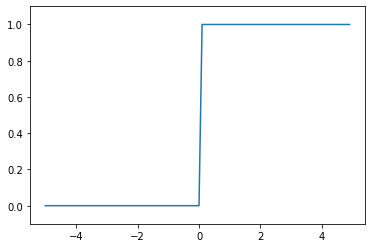

In [0]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5., 5., .1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-.1, 1.1)
plt.show()

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [0]:
x = np.array([-1., 1., 2.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [0]:
t = np.array([1., 2., 3.])
1. + t

array([2., 3., 4.])

In [0]:
1. / t

array([1.        , 0.5       , 0.33333333])

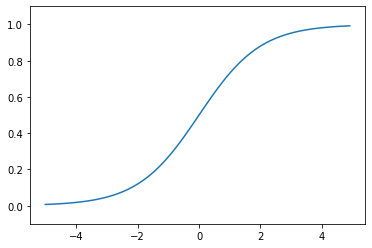

In [0]:
x = np.arange(-5., 5., .1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-.1, 1.1)
plt.show()

In [0]:
def relu(x):
    return np.maximum(0, x)

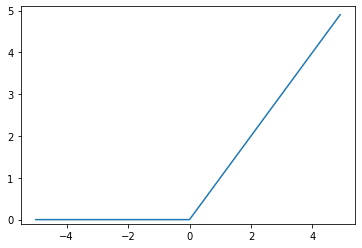

In [0]:
x = np.arange(-5., 5., .1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-.1, 5.1)
plt.show()

In [0]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [0]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [0]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [0]:
X = np.array([1, 2])
X.shape

(2,)

In [0]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [0]:
W.shape

(2, 3)

In [0]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


In [0]:
X = np.array([1., .5])
W1 = np.array([[.1, .3, .5], [.2, .4, .6]])
B1 = np.array([.1, .2, .3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [0]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [0]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [0]:
W2 = np.array([[.1, .4], [.2, .5], [.3, .6]])
B2 = np.array([.1, .2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [0]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [0]:
def indentity_function(x):
    return x

W3 = np.array([[.1, .3], [.2, .4]])
B3 = np.array([.1, .2])

A3 = np.dot(Z2, W3) + B3
Y = indentity_function(A3)
Y

array([0.31682708, 0.69627909])

In [0]:
a = np.array([.3, 2.9, 4.])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [0]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [0]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [0]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [0]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [0]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [0]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [0]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [0]:
a = np.array([.3, 2.9, 4.])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [0]:
np.sum(y)

1.0

In [0]:
from mnist import load_mnist

In [0]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten = True, normalize = False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [0]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [0]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
5
(784,)
(28, 28)


In [0]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [0]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [8]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i : i + batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
